## **Project 7 Macine Learning Jupyter Notebook**
### **Author:** *Jackie Ganyo*
#### **Purpose:** The project 7 notebook will show skills developed throughout the course as well as show knowledge gained in final module on machine learning. 

**Github project repository:**  https://github.com/JackieGanyo/datafun-07-ml

##### **Part 0.** Setup Notebook and Import statements for the notebook.  

In [282]:
import jupyter
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import statistics as stats
import scipy as sp
from scipy import stats
import statsmodels as sm
import logging
import sklearn as sk
from sklearn import model_selection 
from sklearn.model_selection import train_test_split


##### Define variable 'c' as a lambda function that converts fahrenheit to celsius. Create a list of tuples to plot. 


In [283]:
# define c
c = lambda f: 5/9*(f-32)

# create a list of tuples where each tuple is (f, c(f))
temps=[(f, c(f)) for f in range(0,101,10)]

##### **Part 1. Chart a Straight Line**
 Plot the fahrenheit and celcius temperatures to visualize the relationsihp between the two variables.

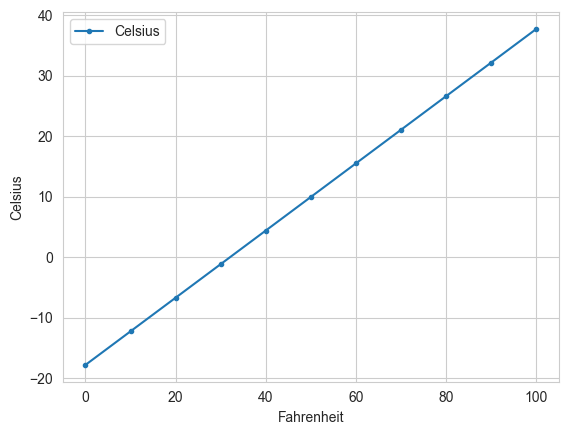

In [284]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


##### **Part 2. Predict Average High Temperatures in NYC in January**
Upload New York City Average High Temperatures into a DataFrame. Print the first 5 rows and the last 5 rows. 

In [285]:
#Upload the data from csv file
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Print the first 5 rows of the data
print(df.head())

# Print the last 5 rows of the data
print(df.tail())


     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


##### Clean the Dataset to prepare for analysis:
1.  renaming value column.
2.  Remove the month notation on dates to simplify x axis labels & truncate last two digits on year


In [286]:
#1. Change "value" column name to "Temperature" 
df.columns = ['Date', 'Temperature', 'Anomaly']

df.head(3)


,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [287]:
#2. Remove the "January" from all dates

df.Date.dtype

#Use Integer division to truncate the last two digits 
df.Date = df.Date.floordiv(100)

df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Calculate basic descriptive statistics on dataset

In [288]:
# Set precision for descriptive statistics--changed from text example because of VS Code error
pd.set_option('display.precision', 2)

# Descriptive statistics on data
df.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

##### Forecasting Future January Average High Temperatures

In [289]:
#Use stats from scipy to run linear regression on the data set
linear_regression = stats.linregress(x=df.Date, y=df.Temperature)

#print slope
print(f'Slope:', linear_regression.slope)

#print intercept
print(f'Intercept:', linear_regression.intercept)


Slope: 0.014771361132966163
Intercept: 8.694993233674289


##### Use the linear regression model to 
1. predict the average high temperature in NYC for a given year
2. approximate average temperature for years prior to 1895 

In [290]:
#1. Use linear regression model and Year 2019
linear_regression.slope * 2019 + linear_regression.intercept

print(f'Predicted temperature in 2019:', linear_regression.slope * 2019 + linear_regression.intercept)

#2. Approximate the average high temperature in 1890
linear_regression.slope * 1890 + linear_regression.intercept    

print(f'Predicted temperature in 1890:', linear_regression.slope * 1890 + linear_regression.intercept)


Predicted temperature in 2019: 38.51837136113297
Predicted temperature in 1890: 36.612865774980335


##### Plotting the Average temperature and a Regression Line using Seaborn's regplot function with the date on the x axis and the temperatures on the y-axis. 

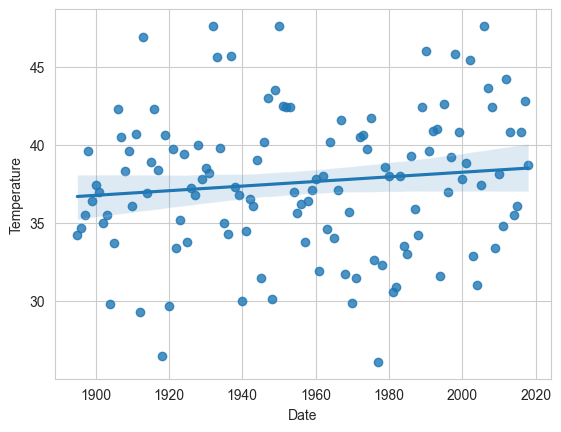

In [291]:
#set style and axes for plot
sns.set_style('whitegrid')
axes = sns.regplot(x=df.Date, y=df.Temperature)

##### Change y axis scale to improve view of linear relationship by increasing the range (10-70 degrees).

(10.0, 70.0)

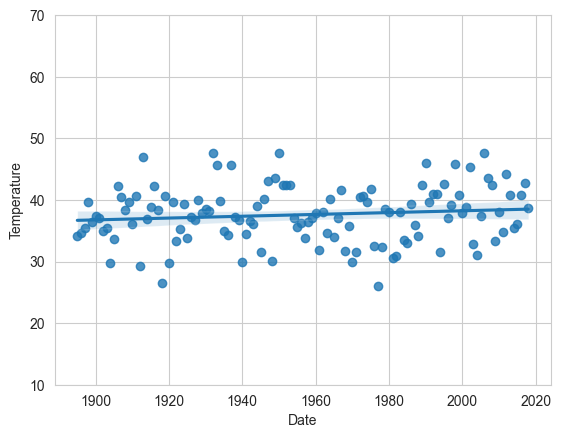

In [292]:
#set style and axes for plot
sns.set_style('whitegrid')
axes = sns.regplot(x=df.Date, y=df.Temperature)

#set limit for y-axis to improve the plot
axes.set_ylim(10, 70)


##### **Part 3. Predicting Average High Temperatures in NYC in January**
Use a different approach (scikit-learn estimator) to create another model. We can utilize the initial code from before (upload data, Change data, and change columns).

In [293]:
#Prep data for new analysis
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

df.columns = ['Date', 'Temperature', 'Anomaly']

df.Date =df.Date.floordiv(100)

df.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Split the data for Training and Testing

In [294]:
#split the data into training and testing sets
X_train, X_Test, y_train, y_test =train_test_split(nyc.Data.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

AttributeError: 'DataFrame' object has no attribute 'Data'